# SIMPLE LINEAR REGRESSION - 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Importing Data

In [2]:
data=pd.read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No 4 SLR Quetions\delivery_time.csv")

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:>

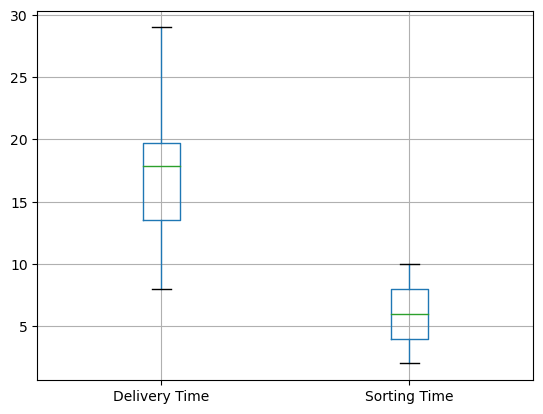

In [6]:
data.boxplot()

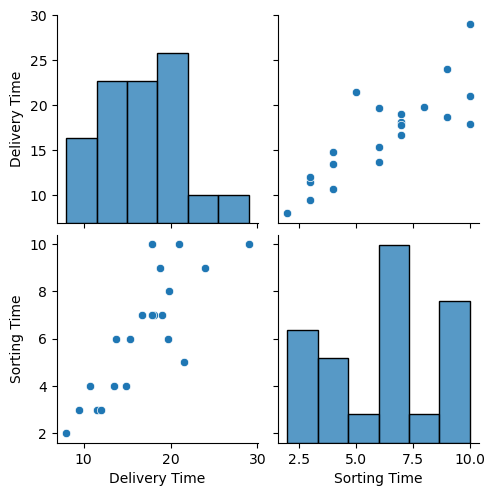

In [7]:
sns.pairplot(data)

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

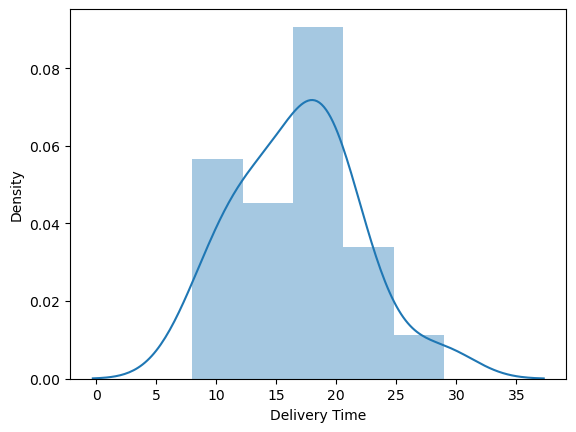

In [8]:
sns.distplot(data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

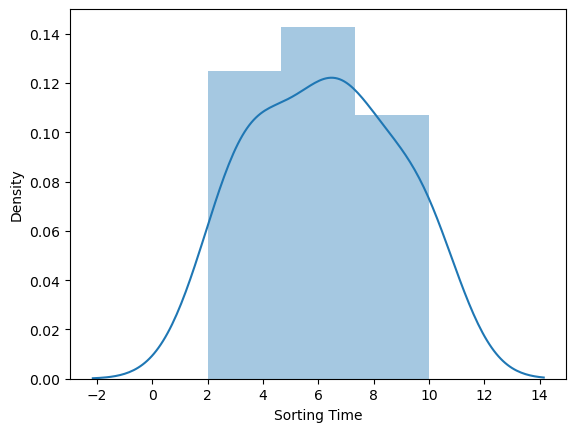

In [9]:
sns.distplot(data['Sorting Time'])

# Renaming Columns

In [10]:
# Renaming Columns
dt=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [11]:
dt.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

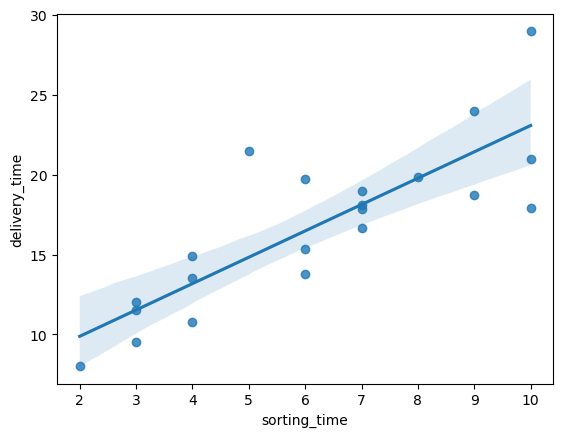

In [12]:
sns.regplot(x=dt['sorting_time'],y=dt['delivery_time'])

# Model Building

In [13]:
model=smf.ols("delivery_time~sorting_time",data=dt).fit()

In [14]:
model

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        12:22:17   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [16]:
#Finding Coefficient Parameter

In [17]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
# Finding tvalues and pvalues

In [19]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [20]:
#Finding Rsquared Values

In [21]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [22]:
#Model Predictions for say sorting time s

In [23]:
delivery_time= (6.582734) + (1.649020)*(5)

In [24]:
delivery_time

14.827834

In [25]:
#Automatic Prediction for say sorting time 5,8

In [26]:
new_data=pd.Series([5,8])

In [27]:
new_data

0    5
1    8
dtype: int64

In [28]:
data_pred=pd.DataFrame(new_data,columns=["sorting_time"])

In [29]:
data_pred

,sorting_time
0,5
1,8


In [30]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

Text(0.5, 1.0, 'Log-Transformed Data')

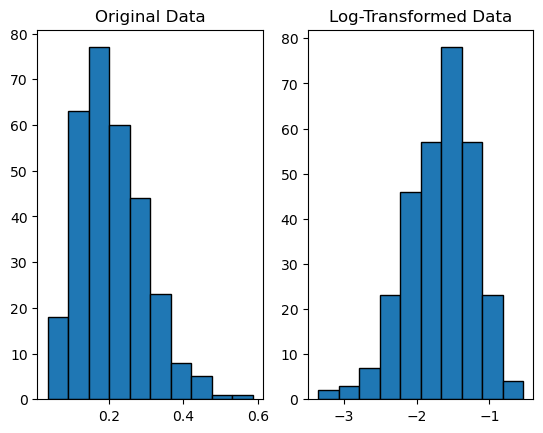

In [31]:
#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data = np.random.beta(a=4, b=15, size=300)

#create log-transformed data
data_log = np.log(data)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

Text(0.5, 1.0, 'Square Root Transformed Data')

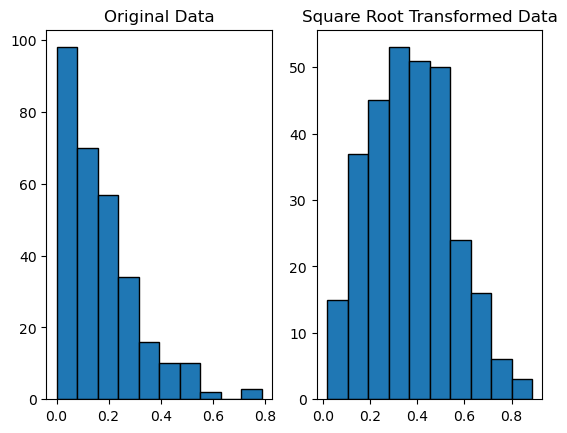

In [32]:
#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data = np.random.beta(a=1, b=5, size=300)

#create log-transformed data
data_log = np.sqrt(data)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

Text(0.5, 1.0, 'Cube Root Transformed Data')

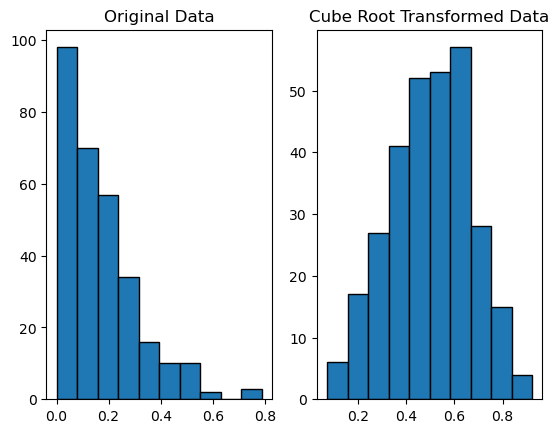

In [33]:

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data = np.random.beta(a=1, b=5, size=300)

#create log-transformed data
data_log = np.cbrt(data)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

# SIMPLE LINEAR REGRESSION - 2

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# # Importing Data

In [35]:
data2=pd.read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No 4 SLR Quetions\Salary_Data.csv")

In [36]:
data2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA & Data Visualization

In [37]:
data2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:>

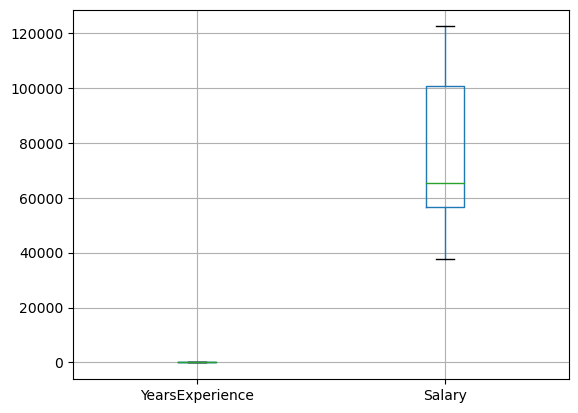

In [39]:
data2.boxplot()

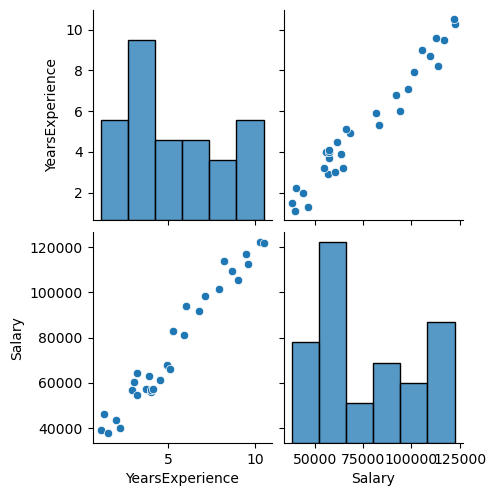

In [40]:
sns.pairplot(data2)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

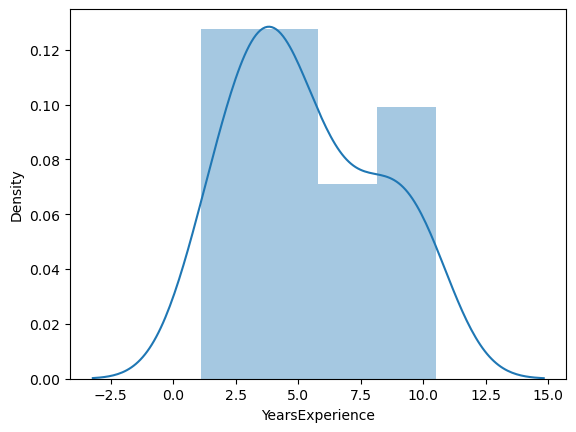

In [41]:
sns.distplot(data2['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

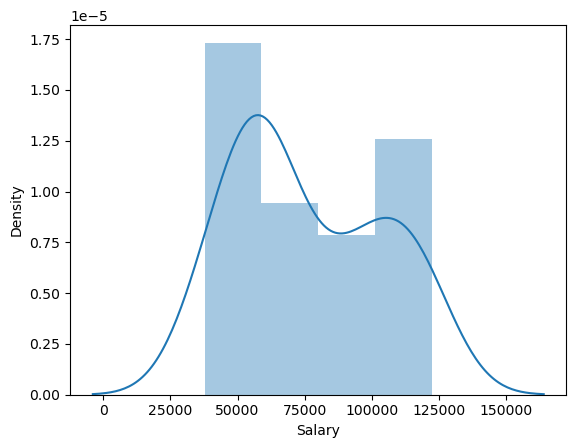

In [42]:
sns.distplot(data2['Salary'])

# Correlation Analysis

In [43]:
data2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

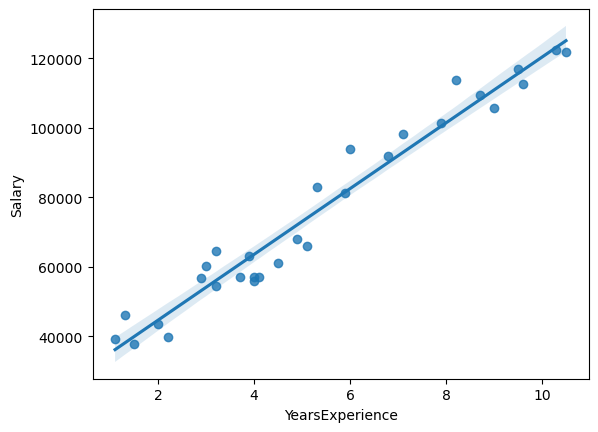

In [44]:
sns.regplot(x=data2['YearsExperience'],y=data2['Salary'])

# Model Building

In [45]:
model=smf.ols("Salary~YearsExperience",data=data2).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        12:22:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing

In [47]:
#finding coefficient Parameters

In [48]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [49]:
# Finding Pvalues and tvalues

In [50]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [51]:
# Finding Rsquared values

In [52]:
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [53]:
# Manual prediction for say 3 Years Experience

In [54]:
Salary = (25792.200199) + (9449.962321)*(3)

In [55]:
Salary

54142.087162

In [56]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [57]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [58]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [59]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

Text(0.5, 1.0, 'Log-Transformed Data')

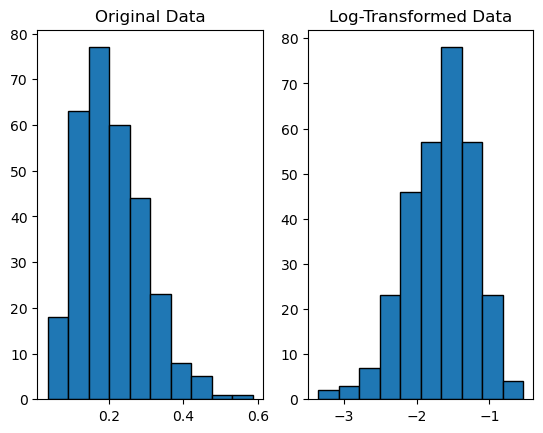

In [60]:

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data2 = np.random.beta(a=4, b=15, size=300)

#create log-transformed data
data2_log = np.log(data2)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data2, edgecolor='black')
axs[1].hist(data2_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

Text(0.5, 1.0, 'Square Root Transformed Data')

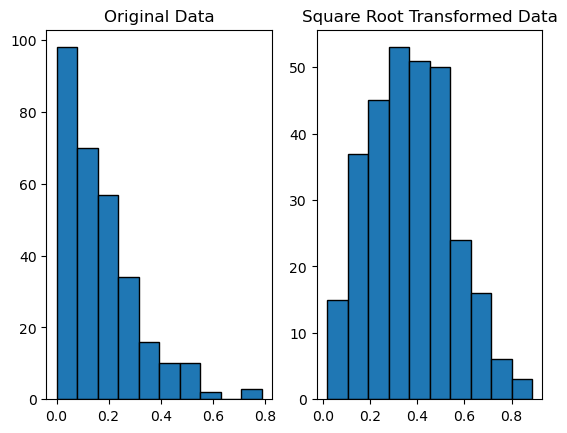

In [61]:
#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data2 = np.random.beta(a=1, b=5, size=300)

#create log-transformed data
data2_log = np.sqrt(data2)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data2, edgecolor='black')
axs[1].hist(data2_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

Text(0.5, 1.0, 'Cube Root Transformed Data')

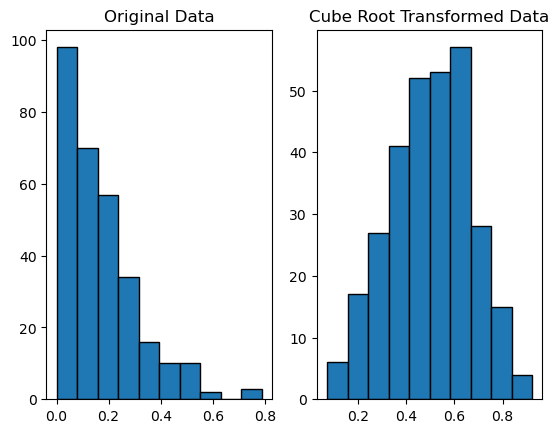

In [62]:

#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data2 = np.random.beta(a=1, b=5, size=300)

#create log-transformed data
data2_log = np.cbrt(data2)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data2, edgecolor='black')
axs[1].hist(data2_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')